<a href="https://colab.research.google.com/github/FredArgoX/Low-Code-AI/blob/main/P03_Advertising_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# https://raw.githubusercontent.com/FredArgoX/Low-Code-AI/refs/heads/main/data_raw/advertising_2023.csv

url = 'https://raw.githubusercontent.com/FredArgoX/Low-Code-AI/refs/heads/main/data_raw/advertising_2023.csv'
advertising_df = pd.read_csv(url, index_col=0)

In [3]:
advertising_df.head()

,digital,TV,radio,newspaper,sales
1,345.15,156.0,37.8,69.2,22.1
2,66.75,46.0,39.3,45.1,10.4
3,25.80,18.3,45.9,69.3,9.3
4,227.25,145.1,41.3,58.5,18.5
5,271.20,165.2,10.8,58.4,12.9


In [4]:
advertising_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1199 entries, 1 to 1197
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   digital    1199 non-null   float64
 1   TV         1199 non-null   float64
 2   radio      1199 non-null   float64
 3   newspaper  1199 non-null   float64
 4   sales      1199 non-null   float64
dtypes: float64(5)
memory usage: 56.2 KB


In [5]:
advertising_df.describe()

,digital,TV,radio,newspaper,sales
count,1199.000000,1199.00000,1199.000000,1199.000000,1199.000000
mean,135.472394,146.61985,23.240617,30.529942,14.005505
std,135.730821,85.61047,14.820827,21.712507,5.202804
min,0.300000,0.70000,0.000000,0.300000,1.600000
25%,24.250000,73.40000,9.950000,12.800000,10.300000
50%,64.650000,149.70000,22.500000,25.600000,12.900000
75%,256.950000,218.50000,36.500000,45.100000,17.400000
max,444.600000,296.40000,49.600000,114.000000,27.000000


In [6]:
advertising_df.isnull().sum()

,0
digital,0
TV,0
radio,0
newspaper,0
sales,0


In [7]:
advertising_df.isnull().values.any()

np.False_

<Axes: >

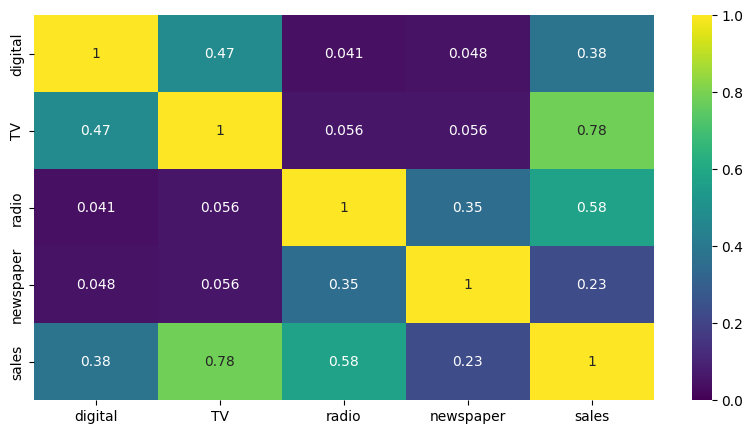

In [8]:
plt.figure(figsize=(10,5))

sns.heatmap(
    advertising_df.corr(),
    annot=True,
    vmin=0,
    vmax=1,
    cmap='viridis'
)

<Axes: xlabel='digital', ylabel='sales'>

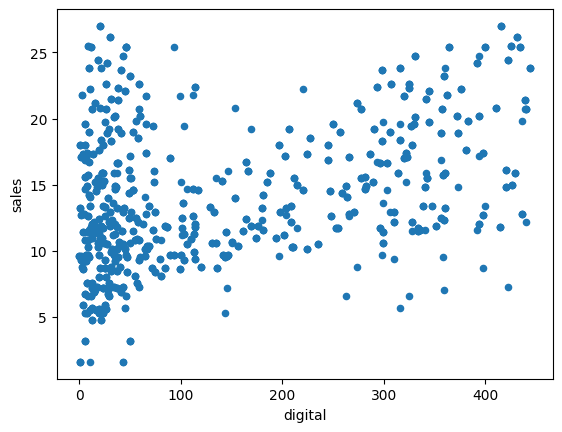

In [9]:
advertising_df.plot(
    kind='scatter',
    x='digital',
    y='sales'
)

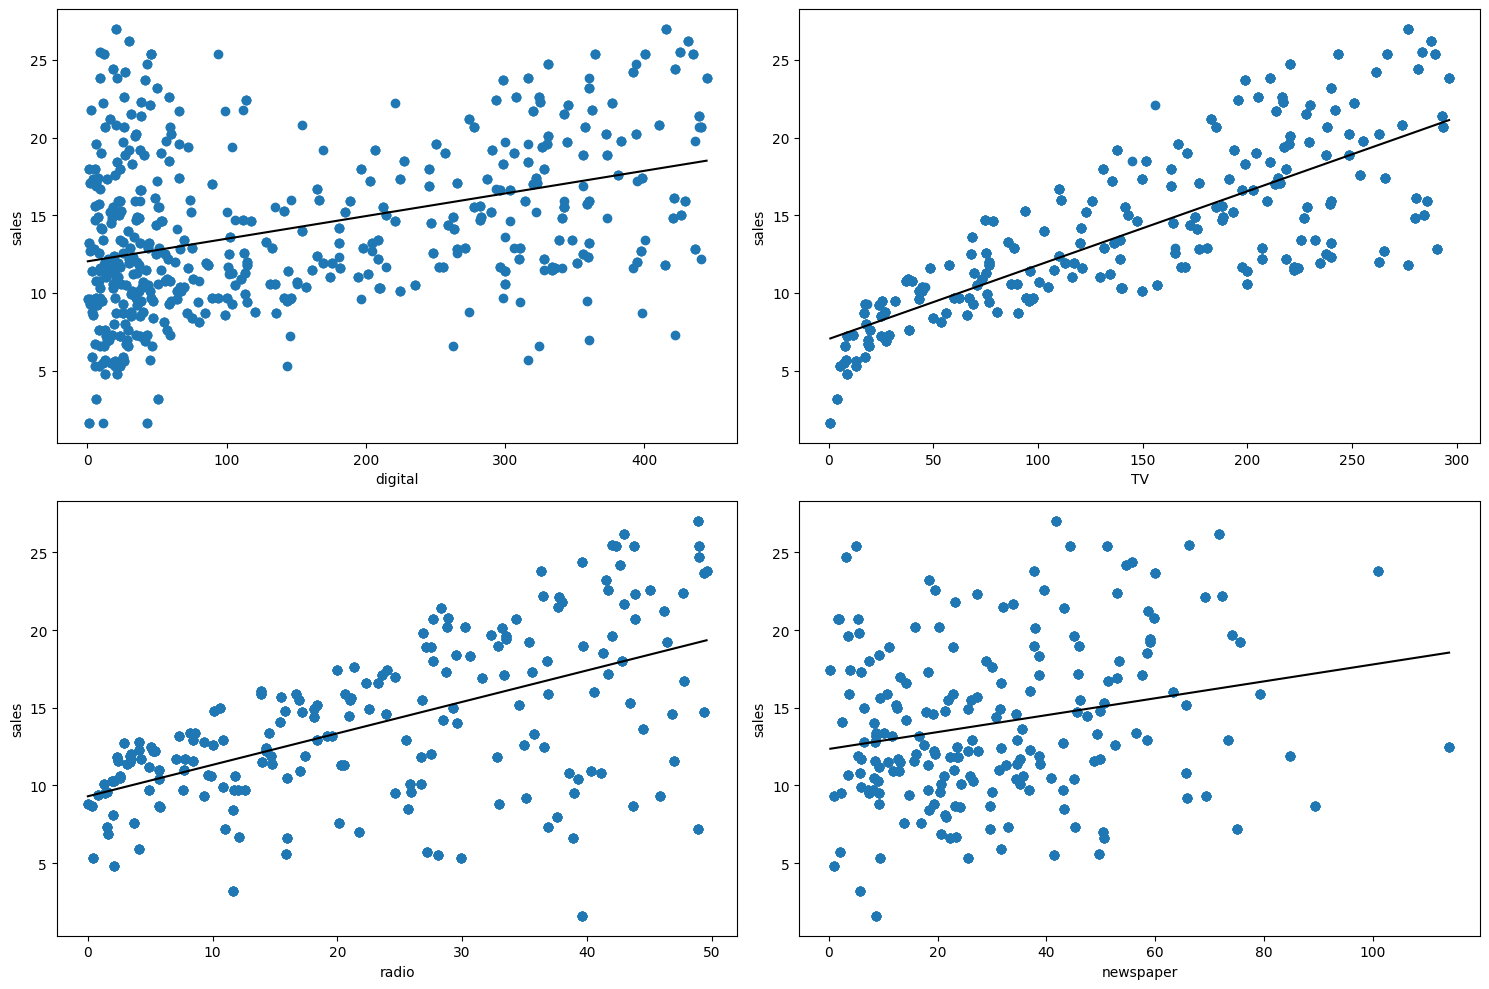

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10)) # create a grid of subplots

# Flatten the axes array to easily iterate
axes = axes.flatten()

for i, col in enumerate(advertising_df.columns[0:4]): # Corrected column indexing
  # Plot on the current axis
  x = advertising_df[col] # x-axis
  y = advertising_df['sales'] # y-axis
  axes[i].plot(x, y, 'o')

  # Create regression line
  axes[i].plot( # Plot on the current axis
      np.unique(x),
      np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),
      color='black'
  )
  axes[i].set_xlabel(col) # x-label
  axes[i].set_ylabel('sales') # y-label

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show() # Display the plots

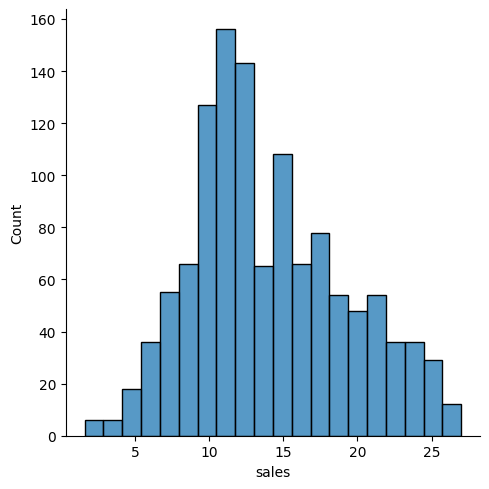

In [11]:
sns.displot(
    advertising_df,
    x="sales"
)

/tmp/ipython-input-19-2904508193.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(advertising_df[i])
/tmp/ipython-input-19-2904508193.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(advertising_df[i])
/tmp/ipython-input-19-2904508193.py:7: UserWarning: 

`distplot` is a deprecated functio

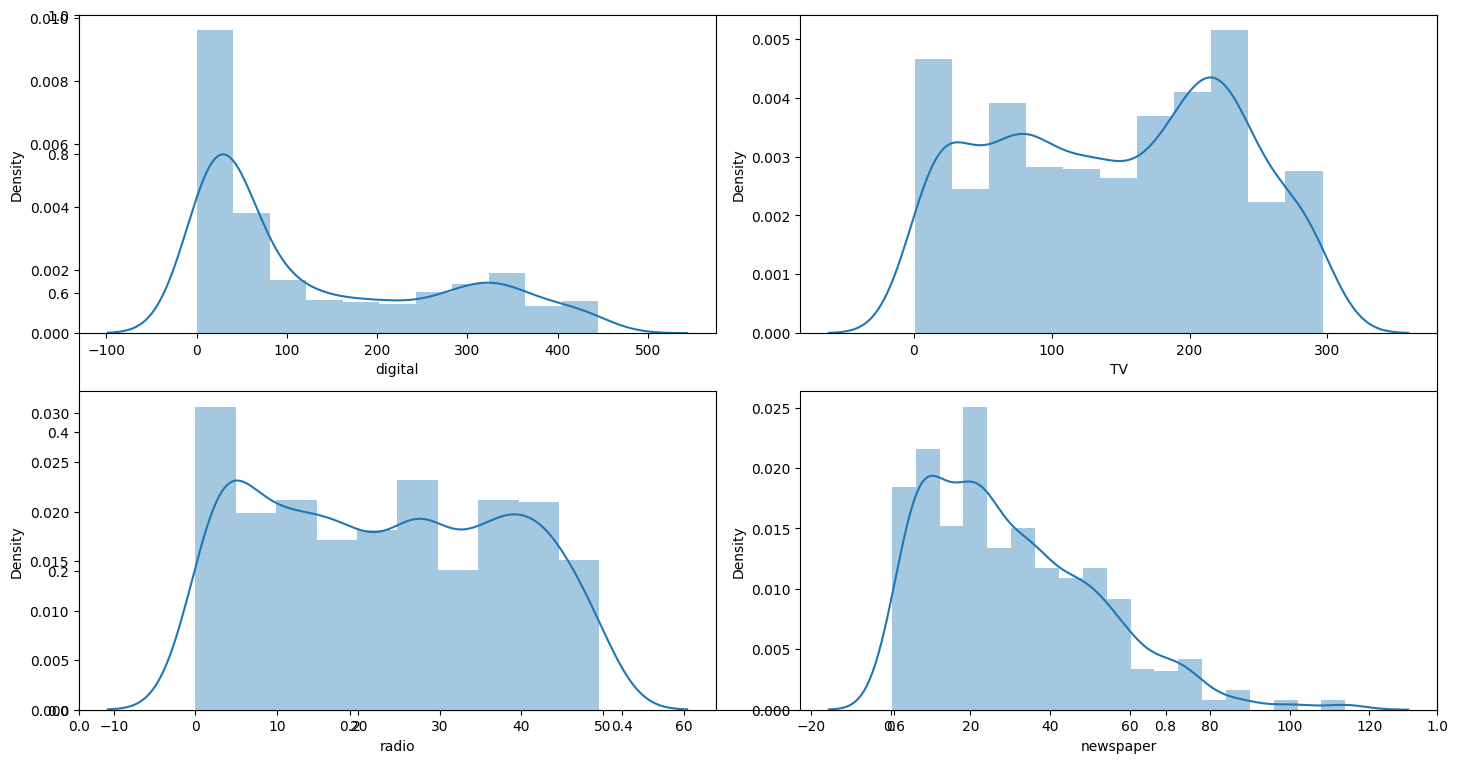

In [19]:
lis = advertising_df.drop(columns=['sales'], axis=1).columns

plt.subplots(figsize=(15,8))
index = 1
for i in lis:
  plt.subplot(2,2, index)
  sns.distplot(advertising_df[i])
  index += 1
plt.tight_layout()
plt.show()